In [672]:
pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [673]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pulp

from scipy import stats

# Initialize seaborn (for plotting)
sns.set()

### LOAD DATA

In [3]:
dfCenters = pd.read_csv("centers.csv")
dfDemands = pd.read_csv("demands.csv")
dfDistances = pd.read_csv("distances.csv")

In [4]:
dfDemands

,Year,Region,Demand
0,2013,Downtown Toronto,249581
1,2013,East York,172730
2,2013,Etobicoke,285764
3,2013,Mississauga East,255427
4,2013,North Toronto,263276
...,...,...,...
65,2022,Etobicoke,445369
66,2022,Mississauga East,395768
67,2022,North Toronto,406148
68,2022,North York,494386


In [5]:
dfCenters

,Center,Opening Costs,Operating Costs,Num MPs,Maximum capacity
0,Center A,0,275000,215,5000000
1,Center B,0,275000,125,5000000
2,Center C,0,275000,100,5000000
3,Center D,0,285000,120,5000000
4,Center E,250000,125000,0,5000000
5,Center F,100000,175000,0,5000000


In [60]:
dfDistances

,Center,Region,Distance
0,Center A,Downtown Toronto,25.77
1,Center A,East York,2.24
2,Center A,Etobicoke,25.72
3,Center A,Mississauga East,28.65
4,Center A,North Toronto,11.64
5,Center A,North York,0.00
6,Center A,Scarborough East,19.76
7,Center B,Downtown Toronto,29.88
8,Center B,East York,16.04
9,Center B,Etobicoke,31.11


### STEP 1: Get The Deterministic Demand


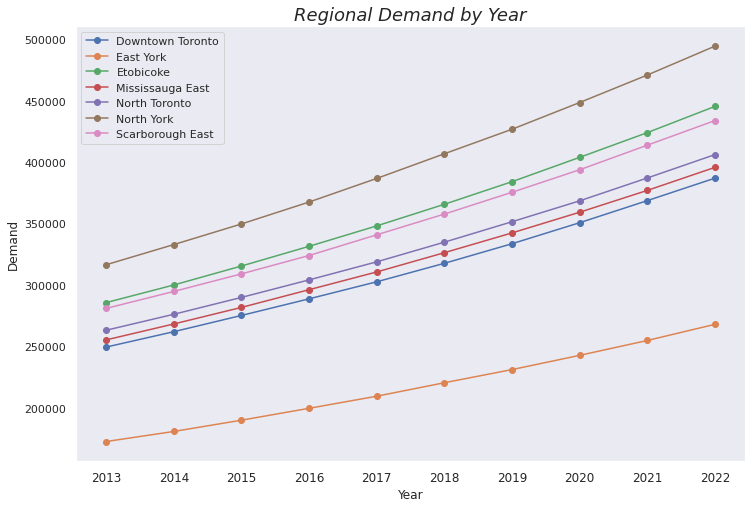

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))

grouped_data = dfDemands.groupby('Region')

# Create a plot for each region
for name, group in grouped_data:
    plt.plot(group['Year'], group['Demand'], label=name, marker='o')

# Add labels and a legend
plt.xlabel('Year')
plt.ylabel('Demand')
plt.title('Regional Demand by Year')
ax.title.set_fontsize(18)
ax.title.set_fontstyle('italic')
plt.legend()

# Add the full labels in the x-axis
ax.tick_params(axis='x', labelsize=12, length=6, width=2)
ax.set_xticks(group['Year'])

# Delete the gridline
ax.grid(linewidth=0)

# Show the plot
plt.show()

**COMMENTS**\
Demands in all regions grows continously. Use the 10-year CAGR to estimate the demands in the next three years.

In [12]:
# Calculate CAGR for each region
regions = dfDemands['Region'].unique()
cagrs = {}
for region in regions:
    df = dfDemands[dfDemands['Region']==region].reset_index(drop=True)
    start_val = df.loc[0, 'Demand']
    end_val = df.loc[len(df)-1, 'Demand']
    num_years = len(df)
    cagr = (end_val/start_val)**(1/num_years) - 1
    cagrs[region] = cagr

# Print the CAGR for each region
for region, cagr in cagrs.items():
    print(f"{region}: {cagr*100:.2f}%")

# Predict demand for the next three years and save results to a new DataFrame
future_years = [2023, 2024, 2025]
predictions = []
for region in regions:
    df = dfDemands[dfDemands['Region']==region].reset_index(drop=True)
    last_val = df.loc[len(df)-1, 'Demand']
    cagr = cagrs[region]
    for year in future_years:
        demand = last_val * (1 + cagr)**(year - df.loc[len(df)-1, 'Year'])
        predictions.append([year, region, demand])
predictions_df = pd.DataFrame(predictions, columns=['Year', 'Region', 'Demand'])
predictions_df

Downtown Toronto: 4.48%
East York: 4.49%
Etobicoke: 4.54%
Mississauga East: 4.48%
North Toronto: 4.43%
North York: 4.56%
Scarborough East: 4.44%


,Year,Region,Demand
0,2023,Downtown Toronto,404356.671308
1,2024,Downtown Toronto,422488.501721
2,2025,Downtown Toronto,441433.384810
3,2023,East York,280112.632011
4,2024,East York,292698.444469
5,2025,East York,305849.753292
6,2023,Etobicoke,465576.693250
7,2024,Etobicoke,486701.268605
8,2025,Etobicoke,508784.327687
9,2023,Mississauga East,413483.385560


### STEP 2: Model With Deterministic Demand In One Period

SETS

In [186]:
# Centers
centers = list(dfCenters['Center'])
numcenters = len(centers)

# Region
region = list(dfDemands['Region'].unique())
numeregion = len(region)

print(centers, region)

['Center A', 'Center B', 'Center C', 'Center D', 'Center E', 'Center F'] ['Downtown Toronto', 'East York', 'Etobicoke', 'Mississauga East', 'North Toronto', 'North York', 'Scarborough East']


In [187]:
# Maximum working hours per day
MaxWorkHour = 6

# Maximum working days per year
MaxWorkDay = 250

# Average cost per distance
DistanceCost = 0.25

# Hourly Wage in 2023
Wage2023 = 37.85

# Governemnt Reimbursement
Reimbursement = 42

# Open Centers
OpenCenters = centers[:4]

PARAMETERS

In [188]:
# Parameters in year 2023
predictions_df_2023 = predictions_df[predictions_df['Year']==2023]

# Demand in each region (dictionary)
regiondemand = {}
for j in region:    
    regiondemand[j] = float(predictions_df_2023[predictions_df_2023['Region']==j]["Demand"])

# Center capacities (dictionary)
centercapacity = {}
for i in centers:
    centercapacity[i] = int(dfCenters[dfCenters['Center']==i]['Maximum capacity'])

# Center opening cost    
openingcost = {}
for i in centers:
    openingcost[i] = int(dfCenters[dfCenters['Center']==i]['Opening Costs'])

# Operation cost
operatingcost = {}
for i in centers:
    operatingcost[i] = int(dfCenters[dfCenters['Center']==i]['Operating Costs'])

# Initaial Workers
initialworker = {}
for i in centers:
    initialworker[i] = int(dfCenters[dfCenters['Center']==i]['Num MPs'])

# Center-Region average distance
CRdistance = {}
for i in centers:
    for j in region:
        CRdistance[(i,j)] = float(dfDistances[(dfDistances["Center"] == i)&(dfDistances["Region"] == j)]["Distance"])

VARIABLE

In [189]:
# Variables: if a center is opened
yvar = pulp.LpVariable.dict("y", centers, cat=pulp.LpBinary)

# Variables: amount of demand from each zone allocated to depot, per scenario
xvar = pulp.LpVariable.dict("x", (centers, region), lowBound=0.0, cat=pulp.LpContinuous)

# Variables: number of initial workers allocated to each center
wvar = pulp.LpVariable.dict("w", centers, lowBound=0, cat=pulp.LpInteger)


MODEL INITIALIZATION

In [196]:
# Initialize model and objective sense
SimpleModel = pulp.LpProblem(name="SimpleModel", sense=pulp.LpMinimize)

CONSTRAINTS

In [197]:
# Contraint 1: hours of services provided by each center to each region could not exceed the demand in each region
for j in region:
    SimpleModel += pulp.lpSum([xvar[(i,j)]] for i in centers) <= regiondemand[j]

# Constraint 2: hours of services provided by each center to each region could not exceed the capacity of each center
for i in centers:
    SimpleModel += pulp.lpSum([xvar[(i,j)] for j in region]) <= centercapacity[i]*yvar[i]

# Constraint 3: hours of services provided by each center to each region could not exceed the total working hours of workers in each center
for i in centers:
    SimpleModel += pulp.lpSum([xvar[i,j] for j in region]) <= MaxWorkHour * MaxWorkDay * wvar[i]   

# Constraint 4: number of initial workers should be equal to 560
SimpleModel += pulp.lpSum([wvar[i] for i in centers]) == 560    

# Constraint 5: centers A, B, C, D must be open
SimpleModel += pulp.lpSum([yvar[i] for i in OpenCenters]) == 4                  

OBJECTIVE FUNCTION

In [198]:
# Center Opening Costs
obj = pulp.lpSum([openingcost[i] * yvar[i] for i in centers])

# Center Operating Costs
obj += pulp.lpSum([operatingcost[i] * yvar[i] for i in centers])

# Service Flow Costs
obj += pulp.lpSum([(CRdistance[(i,j)]*DistanceCost + Wage2023 - Reimbursement) * xvar[(i,j)] for i in centers for j in region])

# add objective to model
SimpleModel += obj

SOLUTION PROCESS

In [199]:
# Write LP to file (optional, but often good to inspect model and find errors)
SimpleModel.writeLP("SimpleModel.lp")

# Solve model
SimpleModel.solve()
print("Status:", pulp.LpStatus[SimpleModel.status])

Status: Optimal


In [200]:
# Total cost
totalCost = pulp.value(SimpleModel.objective)
print("Total cost: " + str(totalCost))

Total cost: -2375999.9999999986


In [201]:
# Print solution (you can add to the dataframe if needed)
for i in centers:
    if yvar[i].varValue >= 1.0:
        print("Depot " + str(i) + " is opened") 
        print(str(wvar[i].varValue) + "MPs work here")                           
        for j in region:
            if xvar[(i,j)].varValue > 0.0:
                print("\t\tServes zone " + str(j) + " - with capacity " + str(xvar[(i,j)].varValue))

Depot Center A is opened
0.0MPs work here
Depot Center B is opened
285.0MPs work here
		Serves zone Scarborough East - with capacity 427500.0
Depot Center C is opened
0.0MPs work here
Depot Center D is opened
275.0MPs work here
		Serves zone Mississauga East - with capacity 412500.0


### Step 3: Model With No Hiring Across All Three Periods

SETS

In [182]:
# Centers
centers = list(dfCenters['Center'])
numcenters = len(centers)

# Region
region = list(dfDemands['Region'].unique())
numeregion = len(region)

# Year
years = list(predictions_df['Year'].unique())

print(centers)
print(region)
print(years)

['Center A', 'Center B', 'Center C', 'Center D', 'Center E', 'Center F']
['Downtown Toronto', 'East York', 'Etobicoke', 'Mississauga East', 'North Toronto', 'North York', 'Scarborough East']
[2023, 2024, 2025]


In [183]:
# Maximum working hours per day
MaxWorkHour = 6

# Maximum working days per year
MaxWorkDay = 250

# Average cost per distance
DistanceCost = 0.25

# Hourly Wage in 2023
Wage2023 = 37.85
Wage = [Wage2023, Wage2023*(1+0.025), Wage2023*(1+0.025)**2]

# Governemnt Reimbursement
Reimbursement = 42

# Open Centers
OpenCenters = centers[:4]

PARAMETERS

In [219]:
# Demand in each region (dictionary)
regiondemand = {}
for t in year:
    for j in region:    
        regiondemand[t,j] = float(predictions_df[(predictions_df['Year'] == t)&(predictions_df['Region'] == j)]["Demand"])

# Center capacities (dictionary)
centercapacity = {}
for i in centers:
    centercapacity[i] = int(dfCenters[dfCenters['Center']==i]['Maximum capacity'])

# Center opening cost    
openingcost = {}
for i in centers:
    openingcost[i] = int(dfCenters[dfCenters['Center']==i]['Opening Costs'])

# Operating cost
operatingcost = {}
for i in centers:
    operatingcost[i] = int(dfCenters[dfCenters['Center']==i]['Operating Costs'])

# Center-Region average distance
CRdistance = {}
for i in centers:
    for j in region:
        CRdistance[(i,j)] = float(dfDistances[(dfDistances["Center"] == i)&(dfDistances["Region"] == j)]["Distance"])

VARIABLE

In [301]:
# Variables: if a center is opened
yvar = pulp.LpVariable.dict("y", (centers, years), cat=pulp.LpBinary)

# Variables: amount of demand from center to region
xvar = pulp.LpVariable.dict("x", (centers, region, years), lowBound=0.0, cat=pulp.LpContinuous)

# Variables: number of initial workers allocated to each center
wvar = pulp.LpVariable.dict("w", (centers, years), lowBound=0, cat=pulp.LpInteger)


MODEL INITIALIZATION

In [417]:
# Initialize model and objective sense
SimpleModel = pulp.LpProblem(name="SimpleModel", sense=pulp.LpMinimize)

CONSTRAINTS

In [418]:
# Contraint 1: hours of services provided by each center to each region could not exceed the demand in each region
for t in years:
    for j in region:
        SimpleModel += pulp.lpSum([xvar[(i,j,t)]] for i in centers) <= regiondemand[(t,j)]

# Constraint 2: hours of services provided by each center to each region could not exceed the capacity of each center
for t in years:
    for i in centers:
        SimpleModel += pulp.lpSum([xvar[(i,j,t)]] for j in region) <= centercapacity[i]*yvar[(i,t)]

# Constraint 3: hours of services provided by each center to each region could not exceed the total working hours of workers in each center
for t in years:
    for i in centers:
        SimpleModel += pulp.lpSum([xvar[i,j,t]] for j in region) <= MaxWorkHour * MaxWorkDay * wvar[(i,t)]   

# Constraint 4: number of initial workers should be equal to 560
for t in [2023]:
    SimpleModel += pulp.lpSum([wvar[(i,t)] for i in centers]) == 560    

# Constraint 5: centers A, B, C, D must be open
for t in years:
    SimpleModel += pulp.lpSum([yvar[(i,t)] for i in OpenCenters]) == 4

for t in [2024,2025]:
    SimpleModel += ((wvar[(i,t)] for i in centers) == wvar[(i,t-1)])

#Constraint 6: Once a center is open it cannot be closed
for t in [2024,2025]:   
    SimpleModel += ([yvar[(i,t)]  for i in centers]) >= yvar[(i,t-1)]
    

OBJECTIVE FUNCTION

In [419]:
# Center Opening Costs
for t in years:
    obj = pulp.lpSum([openingcost[i] * yvar[i,t] for i in centers])

# Center Operating Costs
for t in years:
    obj += pulp.lpSum([operatingcost[i] * yvar[i,t] for i in centers])

# Service Flow Costs
for t in years:
    obj += pulp.lpSum([(CRdistance[(i,j)]*DistanceCost + Wage[t-2023] - Reimbursement) * xvar[(i,j,t)] for i in centers for j in region])

# add objective to model
SimpleModel += obj

SOLUTION PROCESS

In [420]:
# Write LP to file (optional, but often good to inspect model and find errors)
SimpleModel.writeLP("SimpleModel.lp")

# Solve model
SimpleModel.solve()
print("Status:", pulp.LpStatus[SimpleModel.status])

Status: Optimal


In [421]:
# Total cost
totalCost = pulp.value(SimpleModel.objective)
print("Total cost: " + str(totalCost))

Total cost: -2078170.1375624982


In [422]:
# Print solution (you can add to the dataframe if needed)
for t in years:
    for i in centers:
        if yvar[i,t].varValue >= 1.0:
            print("Depot " + str(i) + " is opened") 
            print(str(wvar[i,t].varValue) + "MPs work here")                           
            for j in region:
                if xvar[(i,j,t)].varValue > 0.0:
                    print("\t\tServes zone " + str(j) + " - with capacity " + str(xvar[(i,j,t)].varValue))

Depot Center A is opened
0.0MPs work here
Depot Center B is opened
272.0MPs work here
		Serves zone Scarborough East - with capacity 408000.0
Depot Center C is opened
0.0MPs work here
Depot Center D is opened
0.0MPs work here
Depot Center F is opened
288.0MPs work here
		Serves zone Mississauga East - with capacity 413483.39
Depot Center A is opened
0.0MPs work here
Depot Center B is opened
0.0MPs work here
Depot Center C is opened
0.0MPs work here
Depot Center D is opened
0.0MPs work here
Depot Center F is opened
288.0MPs work here
		Serves zone Mississauga East - with capacity 431991.75
Depot Center A is opened
0.0MPs work here
Depot Center B is opened
0.0MPs work here
Depot Center C is opened
0.0MPs work here
Depot Center D is opened
288.0MPs work here
		Serves zone Mississauga East - with capacity 432000.0


### Step 4: Model With Hiring Across All Three Periods

SETS

In [674]:
# Centers
centers = list(dfCenters['Center'])
numcenters = len(centers)

# Region
region = list(dfDemands['Region'].unique())
numeregion = len(region)

# Year
years = list(predictions_df['Year'].unique())

print(centers)
print(region)
print(years)

['Center A', 'Center B', 'Center C', 'Center D', 'Center E', 'Center F']
['Downtown Toronto', 'East York', 'Etobicoke', 'Mississauga East', 'North Toronto', 'North York', 'Scarborough East']
[2023, 2024, 2025]


In [675]:
# Maximum working hours per day
MaxWorkHour = 6

# Maximum working days per year
MaxWorkDay = 250

# Average cost per distance
DistanceCost = 0.25

# Hourly Wage in 2023
Wage2023 = 37.85
Wage = [Wage2023, Wage2023*(1+0.025), Wage2023*(1+0.025)**2]

# Governemnt Reimbursement
Reimbursement = 42

# Open Centers
OpenCenters = centers[:4]

# Hiring Cost per Worker
HiringCost = 15000

PARAMETERS

In [676]:
# Demand in each region (dictionary)
regiondemand = {}
for t in year:
    for j in region:    
        regiondemand[t,j] = float(predictions_df[(predictions_df['Year'] == t)&(predictions_df['Region'] == j)]["Demand"])

# Center capacities (dictionary)
centercapacity = {}
for i in centers:
    centercapacity[i] = int(dfCenters[dfCenters['Center']==i]['Maximum capacity'])

# Center opening cost    
openingcost = {}
for i in centers:
    openingcost[i] = int(dfCenters[dfCenters['Center']==i]['Opening Costs'])

# Operating cost
operatingcost = {}
for i in centers:
    operatingcost[i] = int(dfCenters[dfCenters['Center']==i]['Operating Costs'])

# Center-Region average distance
CRdistance = {}
for i in centers:
    for j in region:
        CRdistance[(i,j)] = float(dfDistances[(dfDistances["Center"] == i)&(dfDistances["Region"] == j)]["Distance"])

VARIABLE

In [677]:
# Variables: if a center is opened
yvar = pulp.LpVariable.dict("y", (centers, years), cat=pulp.LpBinary)

# Variables: amount of demand from center to region
xvar = pulp.LpVariable.dict("x", (centers, region, years), lowBound=0.0, cat=pulp.LpContinuous)

# Variables: number of initial workers allocated to each center
wvar = pulp.LpVariable.dict("w", (centers, years), lowBound=0, cat=pulp.LpInteger)

# Variables: 
hvar = pulp.LpVariable.dict("h", (centers, years), lowBound=0, upBound=300, cat=pulp.LpInteger)


MODEL INITIALIZATION

In [678]:
# Initialize model and objective sense
SimpleModel = pulp.LpProblem(name="SimpleModel", sense=pulp.LpMinimize)

CONSTRAINTS

In [679]:
# Contraint 1: hours of services provided by each center to each region could not exceed the demand in each region
for t in years:
    for j in region:
        SimpleModel += pulp.lpSum([xvar[(i,j,t)]] for i in centers) == regiondemand[(t,j)]

# Constraint 2: hours of services provided by each center to each region could not exceed the capacity of each center
for t in years:
    for i in centers:
        SimpleModel += pulp.lpSum([xvar[(i,j,t)]] for j in region) <= centercapacity[i]*yvar[(i,t)]

# Constraint 3: hours of services provided by each center to each region could not exceed the total working hours of workers in each center
for t in years:
    for i in centers:
        SimpleModel += pulp.lpSum([xvar[i,j,t]] for j in region) <= MaxWorkHour * MaxWorkDay * (wvar[(i,t)] + hvar[(i,t)])

# Constraint 4: number of initial workers should be equal to 560
for t in [2023]:
    SimpleModel += pulp.lpSum([wvar[(i,t)] for i in centers]) == 560    

# Constraint 5: centers A, B, C, D must be open
#for t in years:
#    SimpleModel += pulp.lpSum([yvar[i,t] for i in OpenCenters]) == 4

# Constranint 6: number of workers in the current year should be equal to the number of workers in the last year plus 
#                number of hiring in the current year
for i in centers:
    for t in [2024,2025]:
        SimpleModel += ((wvar[(i,t)]) == wvar[(i,t-1)] + hvar[(i,t-1)])

#Constraint 7: Once a center is open it cannot be closed
#for i in centers:
#    for t in [2024,2025]:   
#        SimpleModel += (yvar[(i,t)]) >= yvar[(i,t-1)]
    

OBJECTIVE FUNCTION

In [680]:
# Center Opening Costs
obj = pulp.lpSum([openingcost[i] * yvar[i,2023] for i in centers])

# Center Operating Costs
for t in years:
    obj += pulp.lpSum([operatingcost[i] * yvar[i, t] for i in centers])

# Service Flow Costs
for t in years:
    obj += pulp.lpSum([(CRdistance[(i,j)]*DistanceCost + Wage[t-2023] - Reimbursement) * xvar[(i,j,t)] for i in centers for j in region])

# Hiring Costs
for t in years:
    obj += pulp.lpSum([HiringCost * hvar[i,t] for i in centers])

# add objective to model
SimpleModel += obj

SOLUTION PROCESS

In [681]:
# Write LP to file (optional, but often good to inspect model and find errors)
SimpleModel.writeLP("SimpleModel.lp")

# Solve model
SimpleModel.solve()
print("Status:", pulp.LpStatus[SimpleModel.status])

Status: Optimal


In [682]:
# Total cost
totalCost = pulp.value(SimpleModel.objective)
print("Total cost: " + str(totalCost))

Total cost: 9815204.011466032


In [683]:
# Print solution (you can add to the dataframe if needed)
for t in years:
    print("Year " + str(t)) 
    for i in centers:
        if yvar[i,t].varValue >= 1.0:
            print("Depot " + str(i) + " is opened") 
            print(str(wvar[i,t].varValue) + "MPs work here")  
            print("Hiring" + str(hvar[i,t].varValue))                      
            for j in region:
                if xvar[(i,j,t)].varValue > 0.0:
                    print("\t\tServes zone " + str(j) + " - with capacity " + str(xvar[(i,j,t)].varValue))

Year 2023
Depot Center A is opened
232.0MPs work here
Hiring300.0
		Serves zone East York - with capacity 280112.63
		Serves zone Etobicoke - with capacity 651.79154
		Serves zone North York - with capacity 516921.47
Depot Center B is opened
2.0MPs work here
Hiring300.0
		Serves zone Scarborough East - with capacity 453000.0
Depot Center D is opened
0.0MPs work here
Hiring275.0
		Serves zone Mississauga East - with capacity 412500.0
Depot Center E is opened
326.0MPs work here
Hiring300.0
		Serves zone Downtown Toronto - with capacity 404356.67
		Serves zone Etobicoke - with capacity 110500.99
		Serves zone North Toronto - with capacity 424142.34
Depot Center F is opened
0.0MPs work here
Hiring237.0
		Serves zone Etobicoke - with capacity 354423.91
		Serves zone Mississauga East - with capacity 983.38556
		Serves zone Scarborough East - with capacity 92.70561
Year 2024
Depot Center A is opened
532.0MPs work here
Hiring24.0
		Serves zone East York - with capacity 292698.44
		Serves zone 

### Step 5: Model With Hiring Across All Three Periods With Rejection

SETS

In [684]:
# Centers
centers = list(dfCenters['Center'])
numcenters = len(centers)

# Region
region = list(dfDemands['Region'].unique())
numeregion = len(region)

# Year
years = list(predictions_df['Year'].unique())

print(centers)
print(region)
print(years)

['Center A', 'Center B', 'Center C', 'Center D', 'Center E', 'Center F']
['Downtown Toronto', 'East York', 'Etobicoke', 'Mississauga East', 'North Toronto', 'North York', 'Scarborough East']
[2023, 2024, 2025]


In [685]:
# Maximum working hours per day
MaxWorkHour = 6

# Maximum working days per year
MaxWorkDay = 250

# Average cost per distance
DistanceCost = 0.25

# Hourly Wage in 2023
Wage2023 = 37.85
Wage = [Wage2023, Wage2023*(1+0.025), Wage2023*(1+0.025)**2]

# Governemnt Reimbursement
Reimbursement = 42

# Open Centers
OpenCenters = centers[:4]

# Hiring Cost per Worker
HiringCost = 15000

PARAMETERS

In [686]:
# Demand in each region (dictionary)
regiondemand = {}
for t in year:
    for j in region:    
        regiondemand[t,j] = float(predictions_df[(predictions_df['Year'] == t)&(predictions_df['Region'] == j)]["Demand"])

# Center capacities (dictionary)
centercapacity = {}
for i in centers:
    centercapacity[i] = int(dfCenters[dfCenters['Center']==i]['Maximum capacity'])

# Center opening cost    
openingcost = {}
for i in centers:
    openingcost[i] = int(dfCenters[dfCenters['Center']==i]['Opening Costs'])

# Operating cost
operatingcost = {}
for i in centers:
    operatingcost[i] = int(dfCenters[dfCenters['Center']==i]['Operating Costs'])

# Center-Region average distance
CRdistance = {}
for i in centers:
    for j in region:
        CRdistance[(i,j)] = float(dfDistances[(dfDistances["Center"] == i)&(dfDistances["Region"] == j)]["Distance"])

VARIABLE

In [687]:
# Variables: if a center is opened
yvar = pulp.LpVariable.dict("y", (centers, years), cat=pulp.LpBinary)

# Variables: amount of demand from center to region
xvar = pulp.LpVariable.dict("x", (centers, region, years), lowBound=0.0, cat=pulp.LpContinuous)

# Variables: number of initial workers allocated to each center
wvar = pulp.LpVariable.dict("w", (centers, years), lowBound=0, cat=pulp.LpInteger)

# Variables: 
hvar = pulp.LpVariable.dict("h", (centers, years), lowBound=0, upBound=300, cat=pulp.LpInteger)


MODEL INITIALIZATION

In [705]:
# Initialize model and objective sense
SimpleModel = pulp.LpProblem(name="SimpleModel", sense=pulp.LpMinimize)

CONSTRAINTS

In [706]:
# Contraint 1: hours of services provided by each center to each region could not exceed the demand in each region
for t in years:
    for j in region:
        SimpleModel += pulp.lpSum([xvar[(i,j,t)]] for i in centers) == regiondemand[(t,j)]

# Constraint 2: hours of services provided by each center to each region could not exceed the capacity of each center
for t in years:
    for i in centers:
        SimpleModel += pulp.lpSum([xvar[(i,j,t)]] for j in region) <= centercapacity[i]*yvar[(i,t)]

# Constraint 3: hours of services provided by each center to each region could not exceed the total working hours of workers in each center
for t in years:
    for i in centers:
        SimpleModel += pulp.lpSum([xvar[i,j,t]] for j in region) <= MaxWorkHour * MaxWorkDay * (wvar[(i,t)] + hvar[(i,t)])

# Constraint 4: number of initial workers should be equal to 560
for t in [2023]:
    SimpleModel += pulp.lpSum([wvar[(i,t)] for i in centers]) == 560    

# Constraint 5: centers A, B, C, D must be open
#for t in years:
#    SimpleModel += pulp.lpSum([yvar[i,t] for i in OpenCenters]) == 4

# Constranint 6: number of workers in the current year should be equal to the number of workers in the last year plus 
#                number of hiring in the current year
for i in centers:
    for t in [2024,2025]:
        SimpleModel += ((wvar[(i,t)]) == wvar[(i,t-1)] + hvar[(i,t-1)])

#Constraint 7: Once a center is open it cannot be closed
#for i in centers:
#    for t in [2024,2025]:   
#        SimpleModel += (yvar[(i,t)]) >= yvar[(i,t-1)]
    

OBJECTIVE FUNCTION

In [707]:
# Center Opening Costs
obj = pulp.lpSum([openingcost[i] * yvar[i,2023] for i in centers])

# Center Operating Costs
for t in years:
    obj += pulp.lpSum([operatingcost[i] * yvar[i, t] for i in centers])

# Service Flow Costs
for t in years:
    obj += pulp.lpSum([(CRdistance[(i,j)]*DistanceCost + Wage[t-2023] - Reimbursement) * xvar[(i,j,t)] for i in centers for j in region])

# Hiring Costs
for t in years:
    obj += pulp.lpSum([HiringCost * hvar[i,t] for i in centers])

# add objective to model
SimpleModel += obj

SOLUTION PROCESS

In [708]:
# Write LP to file (optional, but often good to inspect model and find errors)
SimpleModel.writeLP("SimpleModel.lp")

# Solve model
SimpleModel.solve()
print("Status:", pulp.LpStatus[SimpleModel.status])

Status: Optimal


In [709]:
# Total cost
totalCost = pulp.value(SimpleModel.objective)
print("Total cost: " + str(totalCost))

Total cost: 9815204.011466032


In [710]:
# Print solution (you can add to the dataframe if needed)
for t in years:
    print("Year " + str(t)) 
    for i in centers:
        if yvar[i,t].varValue >= 1.0:
            print("Depot " + str(i) + " is opened") 
            print(str(wvar[i,t].varValue) + "MPs work here")  
            print("Hiring" + str(hvar[i,t].varValue))                      
            for j in region:
                if xvar[(i,j,t)].varValue > 0.0:
                    print("\t\tServes zone " + str(j) + " - with capacity " + str(xvar[(i,j,t)].varValue))

Year 2023
Depot Center A is opened
232.0MPs work here
Hiring300.0
		Serves zone East York - with capacity 280112.63
		Serves zone Etobicoke - with capacity 651.79154
		Serves zone North York - with capacity 516921.47
Depot Center B is opened
2.0MPs work here
Hiring300.0
		Serves zone Scarborough East - with capacity 453000.0
Depot Center D is opened
0.0MPs work here
Hiring275.0
		Serves zone Mississauga East - with capacity 412500.0
Depot Center E is opened
326.0MPs work here
Hiring300.0
		Serves zone Downtown Toronto - with capacity 404356.67
		Serves zone Etobicoke - with capacity 110500.99
		Serves zone North Toronto - with capacity 424142.34
Depot Center F is opened
0.0MPs work here
Hiring237.0
		Serves zone Etobicoke - with capacity 354423.91
		Serves zone Mississauga East - with capacity 983.38556
		Serves zone Scarborough East - with capacity 92.70561
Year 2024
Depot Center A is opened
532.0MPs work here
Hiring24.0
		Serves zone East York - with capacity 292698.44
		Serves zone 

### Apendix

In [ ]:
# Group the data by region and calculate the CAGR for each region
cagr_by_region = (grouped_data.last() / grouped_data.first()) ** (1 / 9) - 1

# Extract the CAGR values for each region
cagr_values = cagr_by_region.loc[:, 'Demand']

# Print the CAGR for each region
print('CAGR of demand per region:')
print(cagr_values)

# Calculate the demand for the last year for each region
last_year_demand_by_region = grouped_data.tail(1).set_index('Region')['Demand']

# Predict the demand for the next three years for each region
next_three_years_by_region = pd.DataFrame({
    'region': cagr_values.index.repeat(3),
    'year': [2023, 2024, 2025] * len(cagr_values.index),
    'demand': np.tile(last_year_demand_by_region.values * (1 + cagr_values.values), 3)
})

# Print the predicted demand for the next three years for each region
print('Predicted demand for the next three years by region:')
print(next_three_years_by_region)
